# Exploratory Data Analysis into Suicide Rates of Various Countries Around the World from 1985 - 2015

#### Dataset contains suicide numbers for various countries around the world, split by age, gender, year and generation. Dataset also contains corresponding data for the countries GDP and population. Aim of this project is to start exploring the data and generate some top level insights. 

#### 28/11/19 checkpoint: progress is incomplete and code is not DRY

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline               

### Importing the Data

In [40]:
df = pd.read_csv('Datasets\EU_Suicide_Overview.csv')  # importing file, creating DataFrame df
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### Data Cleaning

In [41]:
df.isnull().any()  # checking for null's. As HDI contains nulls, I will remove prior to analysis

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

In [42]:
df.shape

(27820, 12)

In [43]:
df.drop(['HDI for year'], inplace=True, axis=1)
df.shape

(27820, 11)

In [44]:
df.columns   # remaining columns for ease of use later

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [45]:
df = df.rename(columns={'country': 'Country', 
                        'year': 'Year', 
                        'sex': 'Gender', 
                        'age': 'Age', 
                        'suicides_no':'SuicideNumber', 
                        'population': 'Population',
                        'suicides/100k pop': 'Suicidesper100KPop',
                        'country-year': 'Country Year',
                        ' gdp_for_year ($) ': 'GDP',
                        'gdp_per_capita ($)': 'GDPperCapita',
                        'generation': 'Generation'})
df.columns

Index(['Country', 'Year', 'Gender', 'Age', 'SuicideNumber', 'Population',
       'Suicidesper100KPop', 'Country Year', 'GDP', 'GDPperCapita',
       'Generation'],
      dtype='object')

In [46]:
df.drop(['Country Year'], inplace=True, axis=1)   # CountryYear column also holds no added value. Will delete for simplicity
df.shape

(27820, 10)

In [47]:
df['Age'] = df['Age'].str.rstrip(' years')
df.head()                                        # summary of table after cleaning

,Country,Year,Gender,Age,SuicideNumber,Population,Suicidesper100KPop,GDP,GDPperCapita,Generation
0,Albania,1987,male,15-24,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,"2,156,624,900",796,Boomers


### Question 1: How has the number of suicides in the UK changed over time?

In [116]:
uk = df.loc[df['Country'] == 'United Kingdom']                 # filtering for the UK

In [117]:
uk_1 = uk[['Country','Year','SuicideNumber']]                  # Selecting columns of interest
uk_1_group_year = uk_1.groupby('Year')                         # Grouping by Year
data_fig1 = uk_1_group_year.sum()                              # Summing for all age ranges

In [118]:
uk_2 = uk[['Country','Year','Suicidesper100KPop']]             # Selecting columns of interest
uk_2_group_year = uk_2.groupby('Year')                         # Grouping by Year
data_fig2 = uk_2_group_year.sum()                              # Summing for all age ranges

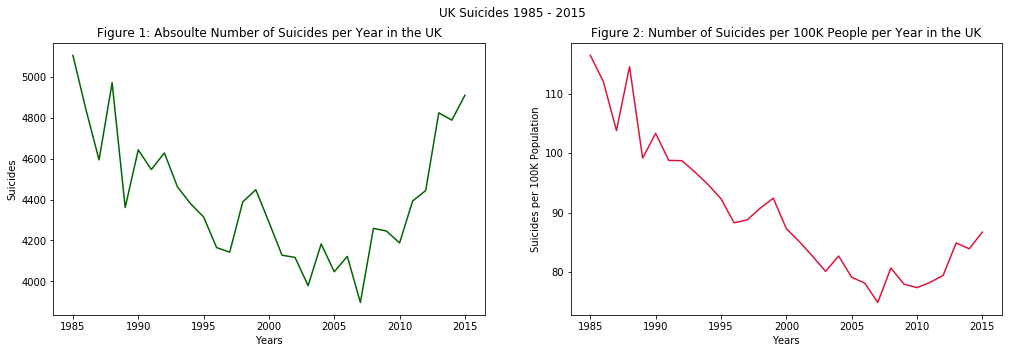

In [140]:
fig, ax = plt.subplots(1,2,figsize=(17,5))                     # Plotting the two datasets

ax[0].plot(data_fig1, 'darkgreen')
ax[0].set_title('Figure 1: Absoulte Number of Suicides per Year in the UK')
ax[0].set_ylabel("Suicides") 
ax[0].set_xlabel("Years") 

ax[1].plot(data_fig2, 'crimson')
ax[1].set_title('Figure 2: Number of Suicides per 100K People per Year in the UK')
ax[1].set_ylabel("Suicides per 100K Population") 
ax[1].set_xlabel("Years") 

plt.suptitle('UK Suicides 1985 - 2015')
plt.show()

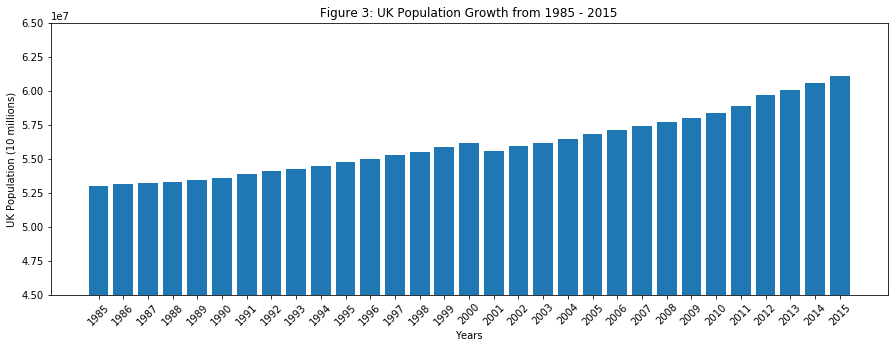

In [419]:
uk_population = uk[['Year',('Population')]].groupby('Year').sum()  # Calculating and filtering UK population for 1985 - 2015

plt.figure(figsize=(15,5))
plt.bar(uk_population.index, uk_population['Population'])        # Plotting UK population growth
plt.title('Figure 3: UK Population Growth from 1985 - 2015')
plt.xticks(uk_population.index, rotation=(45))
plt.xlabel('Years')
plt.ylim(45000000,65000000)
plt.ylabel('UK Population (10 millions)')

plt.show()

##### Figure 1 above shows that the number of suicides in the UK declined from 1985 - 2008, then sharply rose from 2008 onwards. Interestingly, we see from figure 2 that this rise after 2008 is broadly compensated for by a rise in population (shown in figure 3) as, when averaged by population, the rise is much less dramatic as in figure 1. There is however, still a rise. This is likely explained by the pressures people faced, and continue to face, after the economic recession in 2008. Mental health awareness has certainly increased in recent years, and I wonder if that would be reflected in the data for 2015 - 2019 (which unfortunately was not part of this dataset).

### Question 2: How does the UK compare to a similarly developed and culturally comparable country?

In [425]:
usa = df.loc[df['Country'] == 'United States']                   # filtering for the USA
aus = df.loc[df['Country'] == 'Australia']

In [426]:
usa_1 = usa[['Country','Year','SuicideNumber']]                  # Selecting columns of interest
usa_1_group_year = usa_1.groupby('Year')                         # Grouping by Year
data_fig4 = usa_1_group_year.sum()                               # Summing for all age ranges

In [427]:
usa_2 = usa[['Country','Year','Suicidesper100KPop']]             # Selecting columns of interest
usa_2_group_year = usa_2.groupby('Year')                         # Grouping by Year
data_fig5 = usa_2_group_year.sum()                               # Summing for all age ranges

In [430]:
aus_1 = aus[['Country','Year','SuicideNumber']]                  # Performing the same steps for Australia
aus_1_group_year = aus_1.groupby('Year')                         
data_fig6 = aus_1_group_year.sum() 

In [431]:
aus_2 = aus[['Country','Year','Suicidesper100KPop']]             
aus_2_group_year = aus_2.groupby('Year')                         
data_fig7 = aus_2_group_year.sum()  

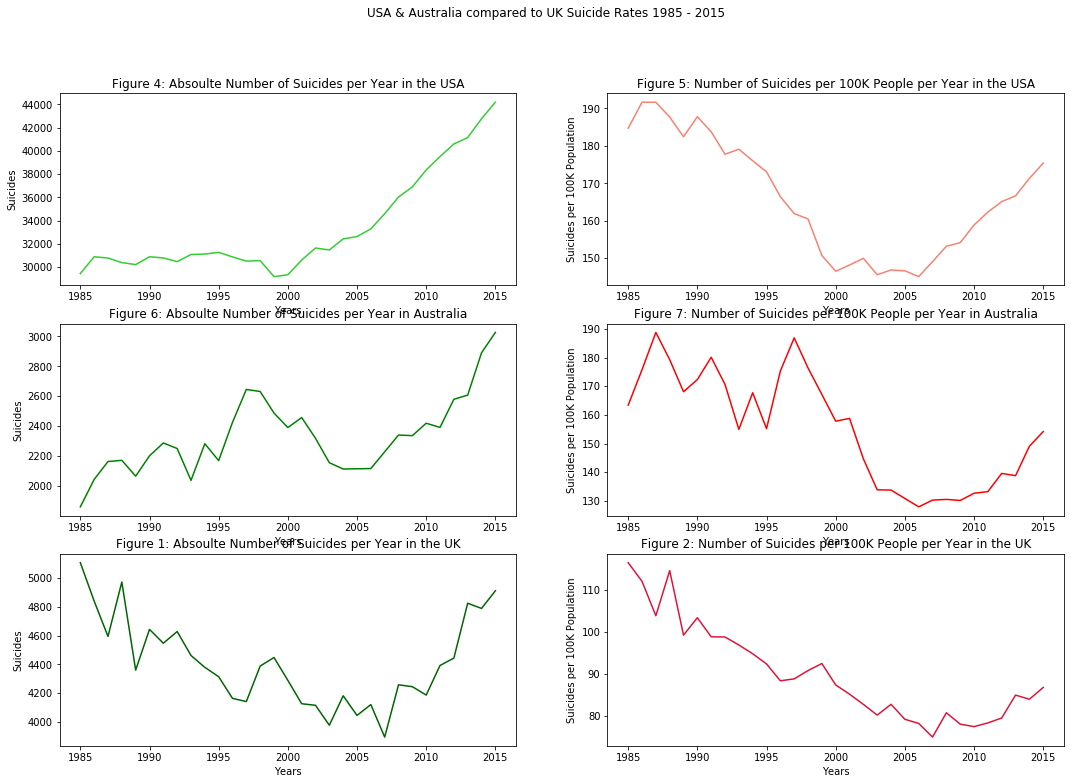

In [440]:
fig, ax = plt.subplots(3,2,figsize=(18,12))                      # Plotting the two datasets for the USA, Australia & UK

ax[0,0].plot(data_fig4, 'limegreen')
ax[0,0].set_title('Figure 4: Absoulte Number of Suicides per Year in the USA')
ax[0,0].set_ylabel("Suicides") 
ax[0,0].set_xlabel("Years")

ax[0,1].plot(data_fig5, 'salmon')
ax[0,1].set_title('Figure 5: Number of Suicides per 100K People per Year in the USA')
ax[0,1].set_ylabel("Suicides per 100K Population") 
ax[0,1].set_xlabel("Years")

ax[1,0].plot(data_fig6, 'g')
ax[1,0].set_title('Figure 6: Absoulte Number of Suicides per Year in Australia')
ax[1,0].set_ylabel("Suicides") 
ax[1,0].set_xlabel("Years")

ax[1,1].plot(data_fig7, 'red')
ax[1,1].set_title('Figure 7: Number of Suicides per 100K People per Year in Australia')
ax[1,1].set_ylabel("Suicides per 100K Population") 
ax[1,1].set_xlabel("Years")

ax[2,0].plot(data_fig1, 'darkgreen')
ax[2,0].set_title('Figure 1: Absoulte Number of Suicides per Year in the UK')
ax[2,0].set_ylabel("Suicides") 
ax[2,0].set_xlabel("Years") 

ax[2,1].plot(data_fig2, 'crimson')
ax[2,1].set_title('Figure 2: Number of Suicides per 100K People per Year in the UK')
ax[2,1].set_ylabel("Suicides per 100K Population") 
ax[2,1].set_xlabel("Years") 

plt.suptitle('USA & Australia compared to UK Suicide Rates 1985 - 2015')
plt.show()                                                 # to do: correct the spacing between graphs to stop overlapping

##### When comparing the UK to culturally comparable and equally economically developed countries the USA and Australia, we see similar trends in suicide rates between these 3 countries (Figures 4-7, 1,2). In terms of absolute numbers of suicides, until the early 2000's the USA has remained steady, Australia has risen, whilst the UK has decreased. After this, all countries see a rise. However, when looking at suicide rates as a factor of population (figures 5, 7 and 2) we see the same trend across all three countries. Here, there is a decrease until around 2008, when all three countires see a rise to lesser or greater extents. We can conclude here that the trend observed in the UK is seen is seen in the USA and Australia and is likely caused by economic factors rather than social or political influences.

### Question 3: What's the difference in suicide rates between UK men and women

In [302]:
# filtering by UK and Male
uk_males = df.loc[(df['Country'] == 'United Kingdom') & (df['Gender'] == 'male'), ['Year','Age','Suicidesper100KPop']]  
# filtering by UK and Female
uk_females = df.loc[(df['Country'] == 'United Kingdom') & (df['Gender'] == 'female'), ['Year','Age','Suicidesper100KPop']]

In [303]:
uk_males_group_year = uk_males.groupby('Year')                # grouping by year in order to sum all age ranges per year
UKMaleSuicideNumberYear = uk_males_group_year.sum()

uk_females_group_year = uk_females.groupby('Year')
UKFemaleSuicideNumberYear = uk_females_group_year.sum()

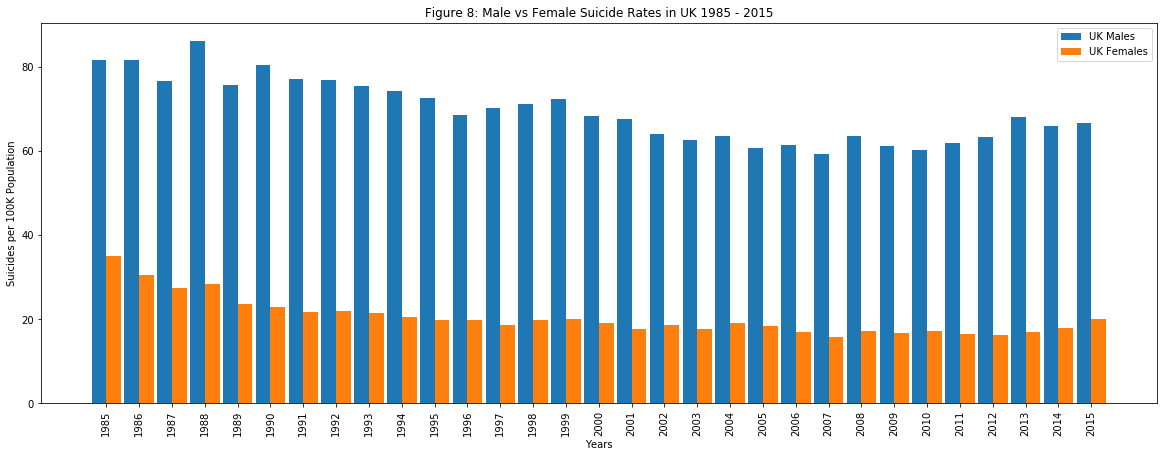

In [441]:
Q3_x_axis = np.arange(31)                            #creating bar graph with UK male and female suicide numbers 
width = 0.45

plt.figure(figsize=(20,7))
plt.bar(Q3_x_axis, UKMaleSuicideNumberYear['Suicidesper100KPop'], width, label='UK Males')
plt.bar(Q3_x_axis+width, UKFemaleSuicideNumberYear['Suicidesper100KPop'], width, label='UK Females')
plt.xticks(Q3_x_axis+width/2,UKMaleSuicideNumberYear.index, rotation='vertical')

plt.title('Figure 8: Male vs Female Suicide Rates in UK 1985 - 2015')
plt.xlabel('Years')
plt.ylabel('Suicides per 100K Population')
plt.legend(loc='best')
plt.show()

##### Figure 8 highlights the difference between UK men and women. We see consistently throughout the years that men are more than tiwice as likely  than women to commit suicide. There could be a number of resons for this, but general concensus is the pressures men are under to be 'manly' and not show or share emotion, which likely leads to the development of mental health conditions such as depression, which can ultimately lead to someone taking their own life.  

### Question 4: How each UK age group has been affected?

In [306]:
uk_males_group = uk_males.groupby('Age')       # Grouping by age
uk_females_group = uk_females.groupby('Age') 

In [307]:
# Storing each male age group as a new variable to plot

males_5_14 = uk_males_group.get_group('5-14')
males_15_24 = uk_males_group.get_group('15-24')
males_25_34 = uk_males_group.get_group('25-34')
males_35_54 = uk_males_group.get_group('35-54')
males_55_74 = uk_males_group.get_group('55-74')
males_75 = uk_males_group.get_group('75+')

In [308]:
# Storing each female age group as a new variable to plot

females_5_14 = uk_females_group.get_group('5-14')
females_15_24 = uk_females_group.get_group('15-24')
females_25_34 = uk_females_group.get_group('25-34')
females_35_54 = uk_females_group.get_group('35-54')
females_55_74 = uk_females_group.get_group('55-74')
females_75 = uk_females_group.get_group('75+')

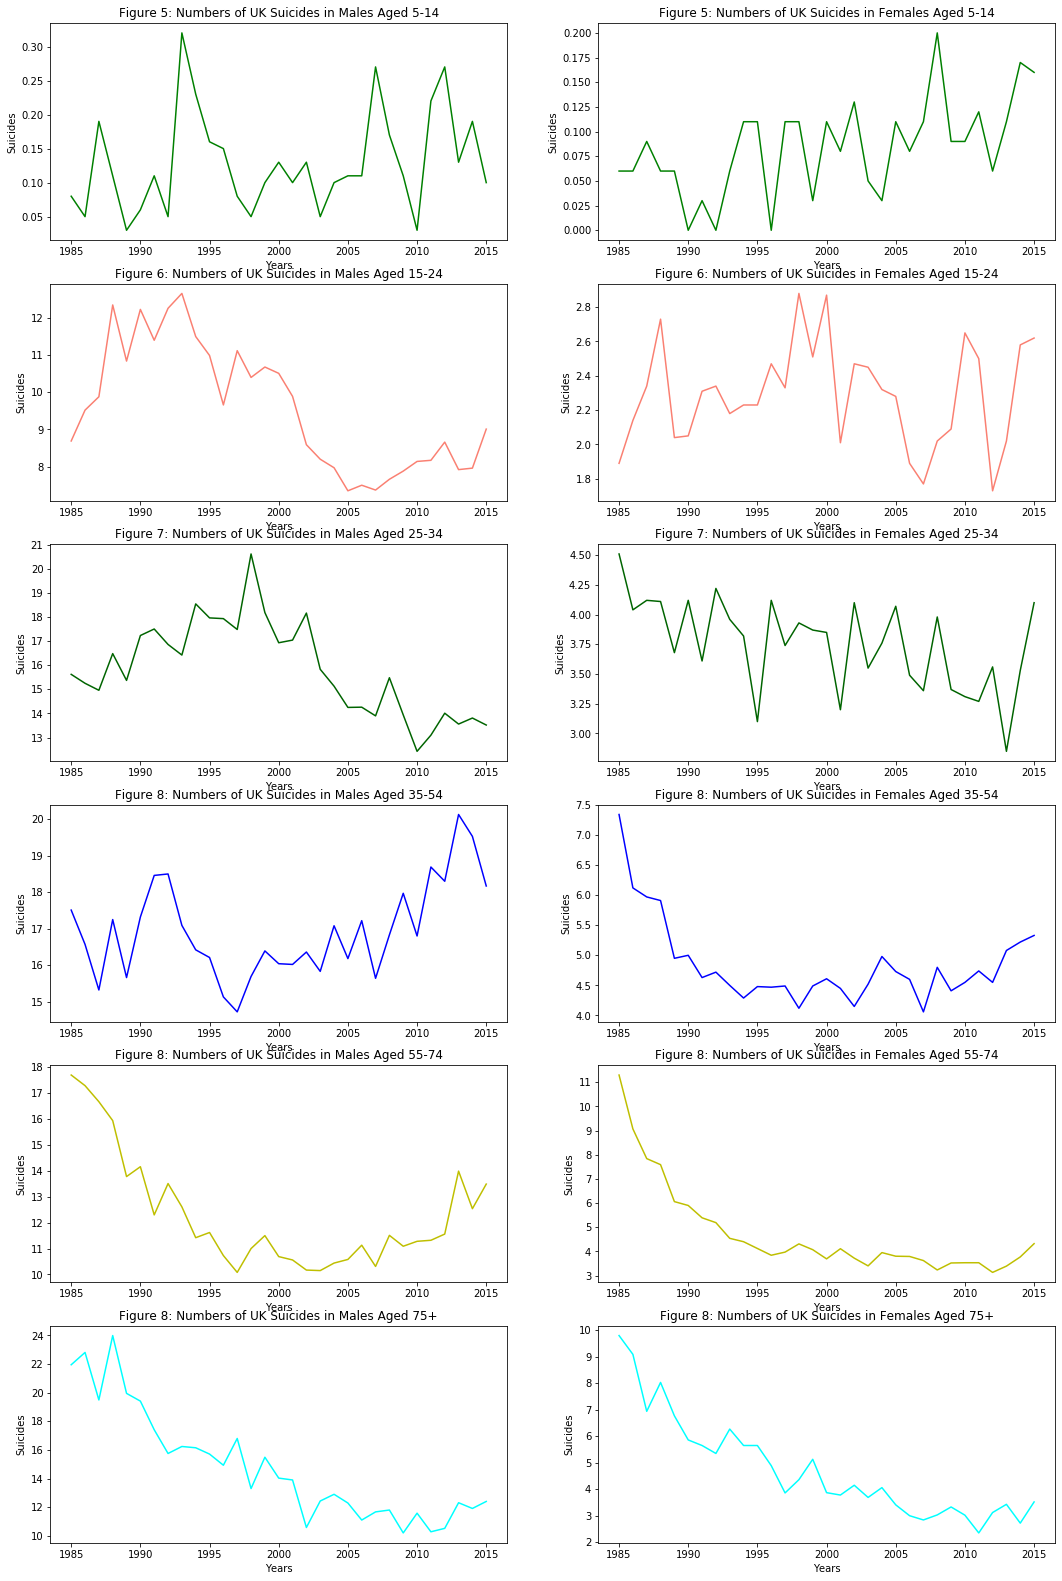

In [335]:
fig, ax = plt.subplots(6,2,figsize=(18,24))   # plotting the different age groups and genders
plt.subplots_adjust(bottom=0.0005)            # adjust to prevent clipping - not optimised. Needs attention

ax[0,0].plot(males_5_14['Year'],males_5_14['Suicidesper100KPop'], 'g')
ax[0,0].set_title('Figure 5: Numbers of UK Suicides in Males Aged 5-14')
ax[0,0].set_ylabel("Suicides") 
ax[0,0].set_xlabel("Years") 

ax[0,1].plot(females_5_14['Year'],females_5_14['Suicidesper100KPop'], 'g')
ax[0,1].set_title('Figure 5: Numbers of UK Suicides in Females Aged 5-14')
ax[0,1].set_ylabel("Suicides") 
ax[0,1].set_xlabel("Years")

ax[1,0].plot(males_15_24['Year'],males_15_24['Suicidesper100KPop'], 'salmon')
ax[1,0].set_title('Figure 6: Numbers of UK Suicides in Males Aged 15-24')
ax[1,0].set_ylabel("Suicides") 
ax[1,0].set_xlabel("Years")

ax[1,1].plot(females_15_24['Year'],females_15_24['Suicidesper100KPop'], 'salmon')
ax[1,1].set_title('Figure 6: Numbers of UK Suicides in Females Aged 15-24')
ax[1,1].set_ylabel("Suicides") 
ax[1,1].set_xlabel("Years")

ax[2,0].plot(males_25_34['Year'],males_25_34['Suicidesper100KPop'], 'darkgreen')
ax[2,0].set_title('Figure 7: Numbers of UK Suicides in Males Aged 25-34')
ax[2,0].set_ylabel("Suicides") 
ax[2,0].set_xlabel("Years") 

ax[2,1].plot(females_25_34['Year'],females_25_34['Suicidesper100KPop'], 'darkgreen')
ax[2,1].set_title('Figure 7: Numbers of UK Suicides in Females Aged 25-34')
ax[2,1].set_ylabel("Suicides") 
ax[2,1].set_xlabel("Years") 

ax[3,0].plot(males_35_54['Year'],males_35_54['Suicidesper100KPop'], 'blue')
ax[3,0].set_title('Figure 8: Numbers of UK Suicides in Males Aged 35-54')
ax[3,0].set_ylabel("Suicides") 
ax[3,0].set_xlabel("Years") 

ax[3,1].plot(females_35_54['Year'],females_35_54['Suicidesper100KPop'], 'blue')
ax[3,1].set_title('Figure 8: Numbers of UK Suicides in Females Aged 35-54')
ax[3,1].set_ylabel("Suicides") 
ax[3,1].set_xlabel("Years")

ax[4,0].plot(males_55_74['Year'],males_55_74['Suicidesper100KPop'], 'y')
ax[4,0].set_title('Figure 8: Numbers of UK Suicides in Males Aged 55-74')
ax[4,0].set_ylabel("Suicides") 
ax[4,0].set_xlabel("Years") 

ax[4,1].plot(females_55_74['Year'],females_55_74['Suicidesper100KPop'], 'y')
ax[4,1].set_title('Figure 8: Numbers of UK Suicides in Females Aged 55-74')
ax[4,1].set_ylabel("Suicides") 
ax[4,1].set_xlabel("Years") 

ax[5,0].plot(males_75['Year'],males_75['Suicidesper100KPop'], 'cyan')
ax[5,0].set_title('Figure 8: Numbers of UK Suicides in Males Aged 75+')
ax[5,0].set_ylabel("Suicides") 
ax[5,0].set_xlabel("Years") 

ax[5,1].plot(females_75['Year'],females_75['Suicidesper100KPop'], 'cyan')
ax[5,1].set_title('Figure 8: Numbers of UK Suicides in Females Aged 75+')
ax[5,1].set_ylabel("Suicides") 
ax[5,1].set_xlabel("Years") 

plt.show()

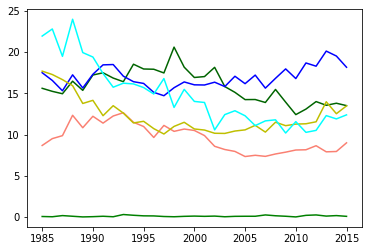

In [359]:
#plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
plt.plot(males_5_14['Year'],males_5_14['Suicidesper100KPop'], 'g')
plt.plot(males_15_24['Year'],males_15_24['Suicidesper100KPop'], 'salmon')
plt.plot(males_25_34['Year'],males_25_34['Suicidesper100KPop'], 'darkgreen')
plt.plot(males_35_54['Year'],males_35_54['Suicidesper100KPop'], 'blue')
plt.plot(males_55_74['Year'],males_55_74['Suicidesper100KPop'], 'y')
plt.plot(males_75['Year'],males_75['Suicidesper100KPop'], 'cyan')

### Question 5: Countries around the world with the highest suicude rate?

In [446]:
# 2012 selected as it is a recent year that has a good representation of countries in the dataset
# Calculating the number of suicides per country in 2012, and sorted descending to make plotted data easier to read

total_2012_Sort_SuicideNumber = df.loc[(df['Year'] == 2012)].groupby('Country').sum().sort_values(
    "SuicideNumber", ascending=False)[:25]
total_2012_Sort_100Kpop = df.loc[(df['Year'] == 2012)].groupby('Country').sum().sort_values(
    "Suicidesper100KPop", ascending=False)[:25]

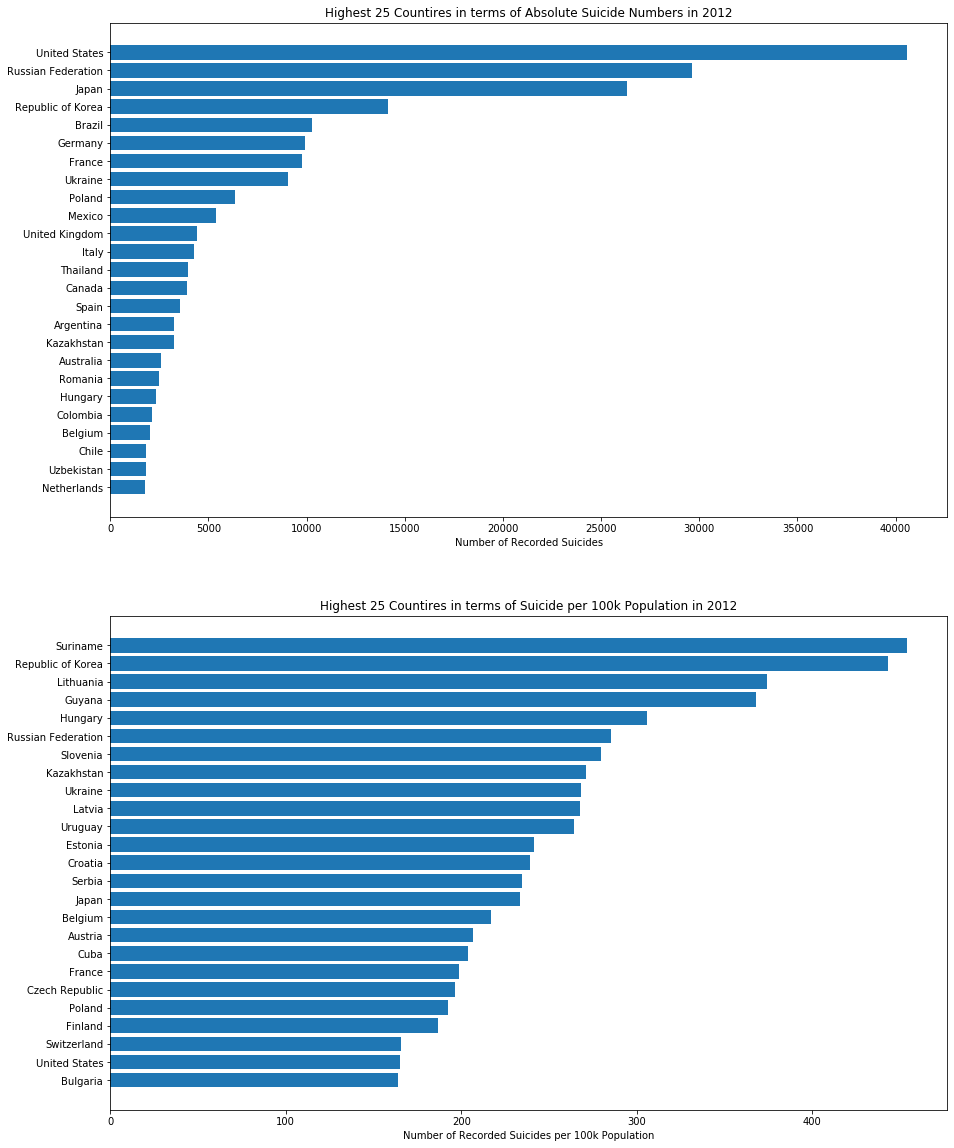

In [447]:
fig, ax = plt.subplots(2,1,figsize=(15,20))

ax[0].barh(total_2012_Sort_SuicideNumber.index,total_2012_Sort_SuicideNumber['SuicideNumber'])
ax[0].invert_yaxis()
ax[0].set_xlabel('Number of Recorded Suicides')
ax[0].set_title('Highest 25 Countires in terms of Absolute Suicide Numbers in 2012')

ax[1].barh(total_2012_Sort_100Kpop.index,total_2012_Sort_100Kpop['Suicidesper100KPop'])
ax[1].invert_yaxis()
ax[1].set_xlabel('Number of Recorded Suicides per 100k Population')
ax[1].set_title('Highest 25 Countires in terms of Suicide per 100k Population in 2012')

plt.show()